In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
import pandas as pd
import data

train_df = pd.read_csv('./data/train.csv')[:10000]
test_df = pd.read_csv('./data/test.csv')

print(train_df.isnull().sum())

2023-04-17 00:00:23.342546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64


In [2]:

train_df["title1_en"] = train_df["title1_en"].apply(data.preprocess_text)
train_df["title2_en"] = train_df["title2_en"].apply(data.preprocess_text)
test_df["title1_en"] = test_df["title1_en"].apply(data.preprocess_text)
test_df["title2_en"] = test_df["title2_en"].apply(data.preprocess_text)

# Concatenate the two titles into a single string
train_df['text'] = train_df['title1_en'] + ' ' + train_df['title2_en']
test_df['text'] = test_df['title1_en'] + ' ' + test_df['title2_en']

label_dict = {'agreed': 0, 'disagreed': 1, 'unrelated': 2}
train_df['label_num'] = train_df['label'].apply(lambda x: label_dict[x])

max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_df['text'])

# convert the text sequences to integer sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'].values)
# train_matrix = tokenizer.texts_to_matrix(train_df['text'].values, mode='tfidf')
# pad the sequences to have the same length
max_length = max([len(seq) for seq in train_sequences])
train_data = pad_sequences(train_sequences, maxlen=max_length)

train_labels = keras.utils.to_categorical(train_df['label_num'].values)

# print(max_features, train_matrix.shape, train_data.shape, len(tokenizer.word_index))
train_data.shape

(10000, 66)

In [3]:
embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(layers.LSTM(100, dropout=0, recurrent_dropout=0))
# Add a classifier
model.add(layers.Dense(3, activation="softmax"))


model.compile("SGD", "categorical_crossentropy", metrics=['accuracy'])

history = model.fit(train_data, train_labels, batch_size=128, epochs=10, validation_split=0.1)


Metal device set to: AMD Radeon Pro 5300M

systemMemory: 16.00 GB
maxCacheSize: 1.99 GB



2023-04-17 00:00:51.556079: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 00:00:51.557129: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-17 00:00:51.557201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 00:00:51.557433: I tensorflow/core/common_runtime/pluggable_device/plug

Epoch 1/10


2023-04-17 00:00:54.834435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-17 00:00:55.101293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-17 00:00:56.697502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - ETA: 0s - loss: 0.9419 - accuracy: 0.6499

2023-04-17 00:01:05.215494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-17 00:01:05.319520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 13s 125ms/step - loss: 0.9419 - accuracy: 0.6499 - val_loss: 0.8398 - val_accuracy: 0.6720
Epoch 2/10
71/71 [==============================] - 8s 106ms/step - loss: 0.8017 - accuracy: 0.6577 - val_loss: 0.7811 - val_accuracy: 0.6720
Epoch 3/10
71/71 [==============================] - 8s 107ms/step - loss: 0.7629 - accuracy: 0.6577 - val_loss: 0.7673 - val_accuracy: 0.6720
Epoch 4/10
71/71 [==============================] - 8s 108ms/step - loss: 0.7480 - accuracy: 0.6577 - val_loss: 0.7644 - val_accuracy: 0.6720
Epoch 5/10
71/71 [==============================] - 8s 107ms/step - loss: 0.7421 - accuracy: 0.6577 - val_loss: 0.7661 - val_accuracy: 0.6720
Epoch 6/10
71/71 [==============================] - 8s 108ms/step - loss: 0.7398 - accuracy: 0.6577 - val_loss: 0.7660 - val_accuracy: 0.6720
Epoch 7/10
71/71 [==============================] - 8s 108ms/step - loss: 0.7389 - accuracy: 0.6577 - val_loss: 0.7665 - val_accuracy: 0.6720
Epoch 8/10
71/71

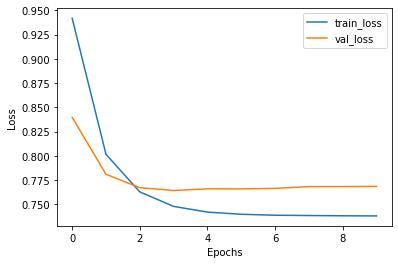

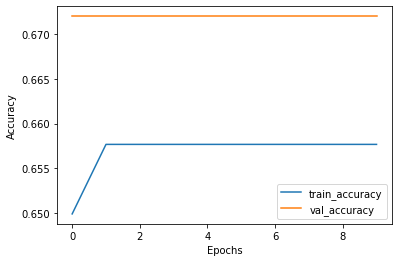

In [4]:
import matplotlib.pyplot as plt
# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

# Plot history
plot_history(
    history.history["loss"],
    history.history["val_loss"],
    history.history["accuracy"],
    history.history["val_accuracy"],
)